SR search and analysis of high order Bessel functions

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from scipy import special
import sympy

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)

from BesselML import Problem
from BesselML import Solution
from BesselML import Promising_solution
sympy.init_printing()

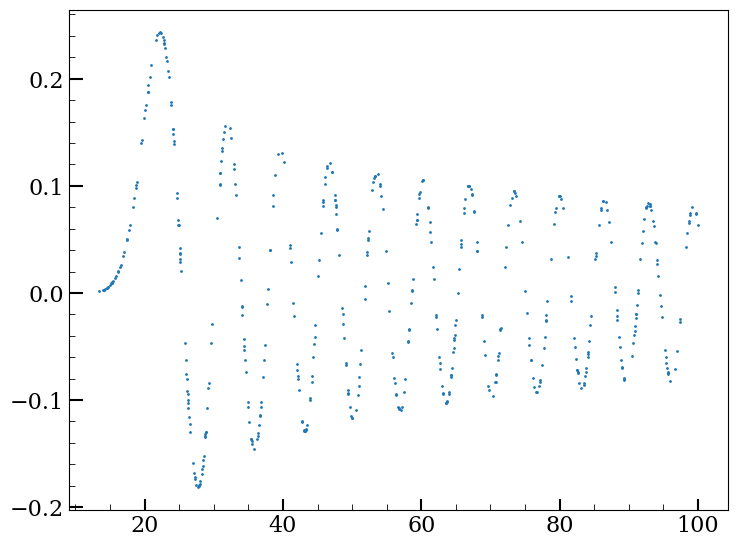

In [12]:
np.random.seed(42) #Keeping the seed for reproducibility

order = 20

#x_train = np.sort(np.concatenate((np.random.uniform(97, 200, 1000), np.linspace(97, 100, 100))))
x_test = np.sort(np.concatenate((np.random.uniform(0, 200, 500), np.linspace(0, 100, 100))))
# Training data from uniform distribution
# x_test = np.sort(np.concatenate((np.random.uniform(0, 20, 300), np.linspace(0, 1.5, 300))))
x_train = np.sort(np.random.uniform(13, 100, 500))
# x_train = np.sort(np.random.uniform(0, 60, 1000))
# x_test = np.sort(np.random.uniform(0, 60, 1000))

target_train = special.jv(order, x_train)
target_test = special.jv(order, x_test)

plt.scatter(x_train, target_train, s=1)

In [13]:
bessel_100_args = {
    'allowed_symbols': "add,sub,mul,div,constant,variable,cos,sin,sqrt,square",
    'epsilon': 1e-5,
    'objectives': ['rmse', 'length'], 
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 50,
    'max_time': 60*10,
    'n_threads': 12,
    'tournament_size': 5,
    'max_selection_pressure': 100,
    'initialization_method': 'btc'
}

Bessel_100 = Problem(f"Bessel function of order {order}", (x_train, target_train), (x_test, target_test), bessel_100_args)

In [14]:
Bessel_100.solve()
print(len(Bessel_100.solutions))

[0.09261824935674667, 5.0], 469.67, (0.025948420167 + ((-0.013866641559) * (0.029896216467 * X1))), 0.01
[0.07816801220178604, 6.0], 476.40, (0.006736193784 + ((-0.072453044355) * sin((0.922652900219 * X1)))), 0.01
[0.07810689508914948, 7.0], 478.02, (0.006820390001 + ((-0.082416251302) * sin(sin((0.922587931156 * X1))))), 0.01
[0.07707879692316055, 8.0], 484.45, (0.035374522209 + ((-0.073467001319) * (sin((0.922899007797 * X1)) - ((-0.007097836584) * X1)))), 0.01
[0.06476691365242004, 9.0], 487.55, (0.008565484546 + ((-0.093897849321) * sin((sin((0.080564975739 * X1)) - ((-0.923247992992) * X1))))), 0.00
[0.06354976445436478, 10.0], 493.38, (0.008850412443 + ((-0.096153698862) * sin((cos(sqrt((1.615428328514 * X1))) - ((-0.922183871269) * X1))))), 0.00
[0.03982929140329361, 11.0], 503.60, (0.003821848659 + ((-0.121181808412) * sin((((0.164682745934 * X1) / ((0.023778555915 * X1) ^ 2)) - ((-1.036735415459) * X1))))), 0.00
[0.03135301545262337, 13.0], 509.73, ((-0.000539723842) + ((-0.7

<Axes: title={'center': 'Bessel function of order 20 - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

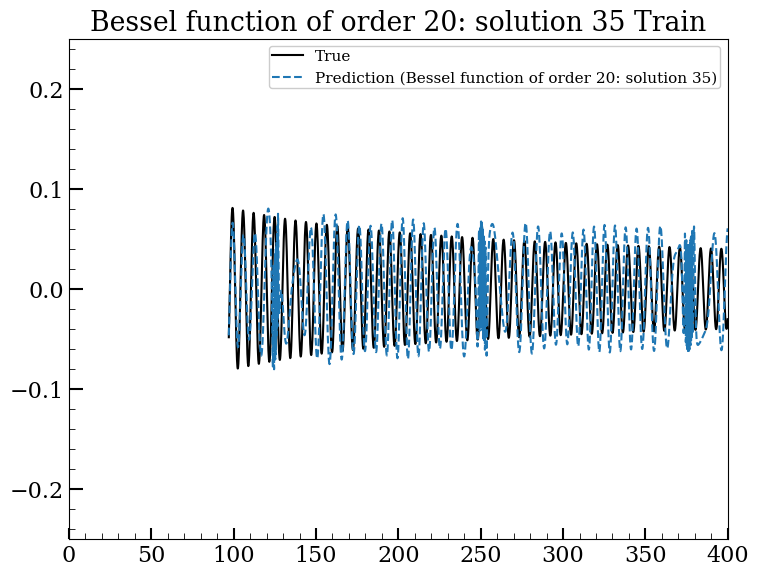

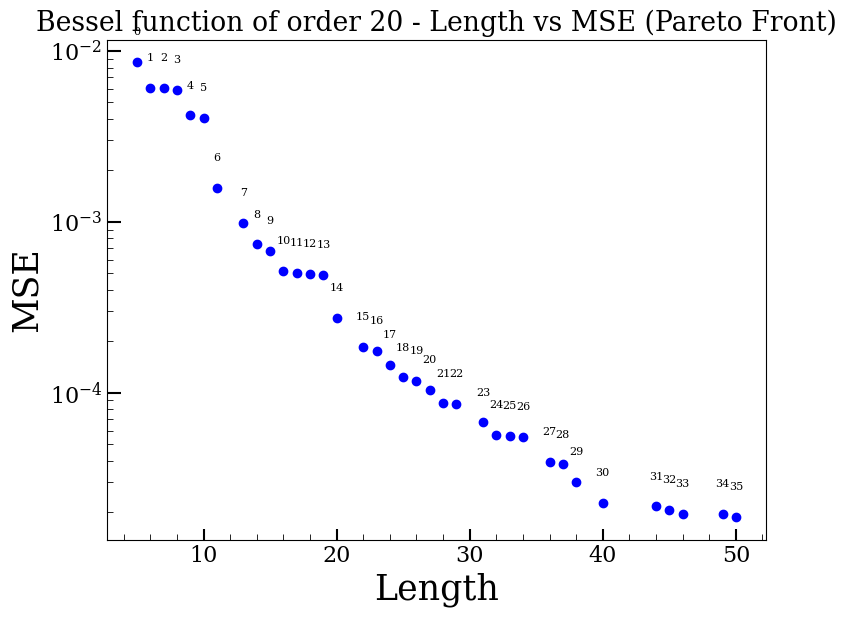

In [16]:
x_outside_train_range = np.sort(np.random.uniform(97, 400, 10000))
Bessel_100.solutions[-1].plot_results(x_outside_train_range, special.jv(order, x_outside_train_range))
plt.ylim(-0.25, 0.25)
plt.xlim(0, 400)
Bessel_100.plot_l_vs_mse()

<IPython.core.display.Math object>

{'b0': 0.052846111356998904, 'b1': 0.9216382503509521, 'b2': 0.07816238701299483, 'b3': 0.025031551718999623, 'b4': 1.8419963000001344e-05, 'b5': 2004.383873231709, 'b6': 0.30386796185513276, 'b7': 0.14673914015298806, 'b8': 0.7663517594339737, 'b9': 688.257476379862, 'b10': 3.579661761121315, 'b11': 0.9230431914329529, 'b12': 1768.597666736925, 'b13': 0.09506780654200497, 'b14': 18.171464578004816, 'b15': 0.17191115021699943}


<Axes: title={'center': 'Fractional Error Comparison for Bessel Function (order=20)'}, xlabel='$x$', ylabel='Fractional Error'>

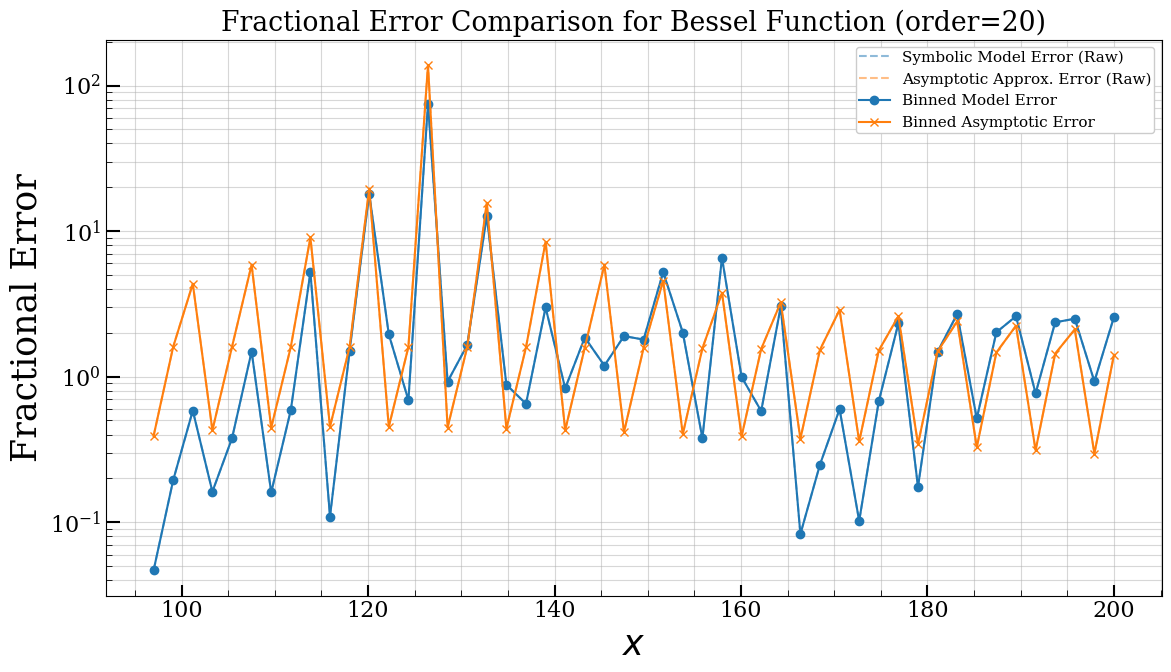

In [17]:
x_err = np.linspace(97, 200)
k=-1
Bessel_100.solutions[k].display_expression()
b_vals = Bessel_100.solutions[k].extract_and_format()[1]
print(b_vals)
Bessel_100.solutions[k].plot_error(x_err, order, kind='first', spherical=False, metric='fractional', smoothing = 'binned',num_bins=50,
                   show_approx=True, show_trunc=False, trunc_index=100 )
